In [5]:
%matplotlib inline


===================================================
Label Propagation digits: Demonstrating performance
===================================================

This example demonstrates the power of semisupervised learning by
training a Label Spreading model to classify handwritten digits
with sets of very few labels.

The handwritten digit dataset has 1797 total points. The model will
be trained using all points, but only 30 will be labeled. Results
in the form of a confusion matrix and a series of metrics over each
class will be very good.

At the end, the top 10 most certain and the top 10 most uncertain predictions will be shown.



Automatically created module for IPython interactive environment
Label Spreading model: 30 labeled & 300 unlabeled points (330 total)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        23
          1       0.58      0.50      0.54        28
          2       0.93      0.93      0.93        29
          3       0.00      0.00      0.00        28
          4       0.92      0.88      0.90        25
          5       0.96      0.76      0.85        33
          6       0.97      0.97      0.97        36
          7       0.89      1.00      0.94        34
          8       0.51      0.79      0.62        29
          9       0.51      0.80      0.62        35

avg / total       0.73      0.77      0.74       300

Confusion matrix
[[23  0  0  0  0  0  0  0  0]
 [ 0 14  2  0  0  1  0 11  0]
 [ 0  0 27  0  0  0  2  0  0]
 [ 0  3  0 22  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  8]
 [ 0  1  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0 34  0  0]


/home/jose/.local/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/home/jose/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


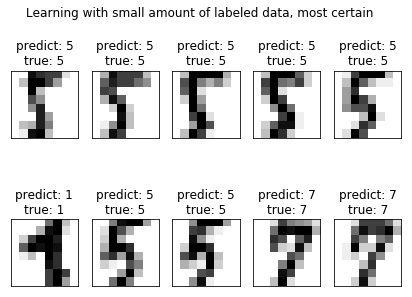

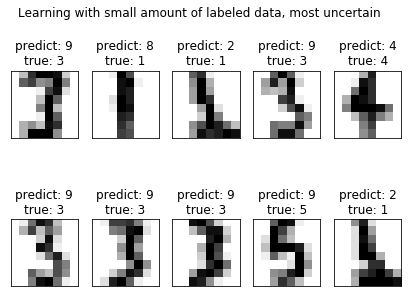

In [10]:
print(__doc__)

# Authors: Clay Woolam <clay@woolam.org>
# License: BSD

import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

# parche si no es necesario eliminar
from scipy.sparse import csgraph

from sklearn import datasets
from sklearn.semi_supervised import label_propagation

from sklearn.metrics import confusion_matrix, classification_report

digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]

n_total_samples = len(y)
n_labeled_points = 30

indices = np.arange(n_total_samples)

unlabeled_set = indices[n_labeled_points:]

# #############################################################################
# Shuffle everything around
y_train = np.copy(y)
y_train[unlabeled_set] = -1

# #############################################################################
# Learn with LabelSpreading
lp_model = label_propagation.LabelSpreading(gamma=0.25, max_iter=5)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]

cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

# #############################################################################
# Calculate uncertainty values for each transduced distribution
pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)

# #############################################################################
# Pick the top 10 most certain labels
uncertainty_index = np.argsort(pred_entropies)[:10]

# #############################################################################
# Plot
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

f.suptitle('Learning with small amount of labeled data, most certain')
plt.show()

# #############################################################################
# Pick the top 10 most uncertain labels
uncertainty_index = np.argsort(pred_entropies)[-10:]

# #############################################################################
# Plot
f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title('predict: %i\ntrue: %i' % (
        lp_model.transduction_[image_index], y[image_index]))

f.suptitle('Learning with small amount of labeled data, most uncertain')
plt.show()